<a href="https://colab.research.google.com/github/miroorc/Capstone-Project/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
torch.cuda.is_available()


True

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 14.4 MB/s eta 0:00:00


In [ ]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 84.0 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
#define model and tokenizer
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
import json
import os

#open data
file_path = "/content/drive/MyDrive/Capstone Project/clean_dev/cleaned_001-100036.json"
with open(file_path, 'r') as f:
  data = json.load(f)
print(data)

{'IMPORTANCE': '4', 'CONCLUSION': 'Violation of Art. 5-3;No violation of Art. 6-1;No violation of Art. 6-3-d', 'TEXT': ['CARDINAL . The applicant was born in DATE and lives in ORG .', 'The facts of the case , as submitted by the parties , may be summarised as follows .', 'CARDINAL . On DATE the applicant was arrested on suspicion of armed robbery . While remanded in custody the applicant was held in FAC , ORG and other remand establishments .', "CARDINAL . On DATE ORG authorised the applicant 's remand in custody until DATE . In ordering the detention , the court referred to the nature and gravity of the charges against the applicant , and stated that “ it was likely that the applicant could attempt to abscond from investigators and the trial as well as obstruct the establishment of the truth in the case ” . The applicant and his defence counsel were present at the hearing .", "CARDINAL . On DATE ORG extended the term of the applicant 's detention until DATE due to the fear “ that he w

In [ ]:
data = data["TEXT"]
data = "".join(data)
data = data.replace("...", "")

In [ ]:
data

"CARDINAL . The applicant was born in DATE and lives in ORG .The facts of the case , as submitted by the parties , may be summarised as follows .CARDINAL . On DATE the applicant was arrested on suspicion of armed robbery . While remanded in custody the applicant was held in FAC , ORG and other remand establishments .CARDINAL . On DATE ORG authorised the applicant 's remand in custody until DATE . In ordering the detention , the court referred to the nature and gravity of the charges against the applicant , and stated that “ it was likely that the applicant could attempt to abscond from investigators and the trial as well as obstruct the establishment of the truth in the case ” . The applicant and his defence counsel were present at the hearing .CARDINAL . On DATE ORG extended the term of the applicant 's detention until DATE due to the fear “ that he would abscond ” . The applicant 's lawyer was present at the hearing .CARDINAL . On DATE the applicant appealed against that ruling .CARD

In [ ]:
#use sliding window technique in order to go through all tokens, even above the ones goes over the token limit
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
tokens = tokenizer.tokenize(your_text)
chunks = [tokens[i:i + 512] for i in range(0, len(tokens), 512)]

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import os, json

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base')

def analysis(file_path, name):
  #edit some of the unnecessary data
  with open(file_path, 'r') as f:
    data = json.load(f)
    data = data["TEXT"]
    data = "".join(data).replace("...", "")
  text = data
  # Tokenize the text
  tokens = tokenizer.tokenize(text)

  # Split tokens into chunks, overlap of 100 tokens
  chunk_size = 514
  chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size - 15)]
  # print("chunks: ", chunks)
  # Process each chunk separately
  predictions = []

  for chunk in chunks:
      # Convert chunk to string
      chunk_text = tokenizer.convert_tokens_to_string(chunk)
      # Encode chunk and run through model
      inputs = tokenizer(chunk_text, return_tensors='pt', truncation=True, padding=True)
      output = model(**inputs)
      # Apply softmax to output to get probabilities
      probabilities = torch.nn.functional.softmax(output.logits, dim=-1)
      predictions.append(probabilities)

    # Aggregate predictions
    # This is just a simple example: you might want to use a more sophisticated method
  aggregated_predictions = torch.mean(torch.stack(predictions), dim=0)
  output = aggregated_predictions.detach().numpy()
  return output[0]





input_directory = '/content/drive/MyDrive/Capstone Project/clean_dev'
final_dev = []
# loop through the files
for filename in os.listdir(input_directory):
    if filename.endswith('.json'):  # check if file is a json file
        name = filename[8:18]
        file_path = os.path.join(input_directory, filename)
        ans = analysis(file_path, name)
        final_dev.append(ans)


print(final_dev)




Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

[array([0.5253524, 0.4746476], dtype=float32), array([0.5268563 , 0.47314373], dtype=float32), array([0.52581817, 0.47418183], dtype=float32), array([0.52450347, 0.47549662], dtype=float32), array([0.52595466, 0.47404537], dtype=float32), array([0.5252938 , 0.47470614], dtype=float32), array([0.5279709, 0.4720291], dtype=float32), array([0.5245175 , 0.47548246], dtype=float32), array([0.5272206 , 0.47277942], dtype=float32), array([0.5244186 , 0.47558147], dtype=float32), array([0.5254388, 0.4745612], dtype=float32), array([0.52775806, 0.47224188], dtype=float32), array([0.5245584 , 0.47544155], dtype=float32), array([0.5246734 , 0.47532666], dtype=float32), array([0.5268715 , 0.47312856], dtype=float32), array([0.5263937 , 0.47360632], dtype=float32), array([0.5249924 , 0.47500762], dtype=float32), array([0.5261116 , 0.47388837], dtype=float32), array([0.52500355, 0.47499648], dtype=float32), array([0.5261327 , 0.47386727], dtype=float32), array([0.526924, 0.473076], dtype=float32), a

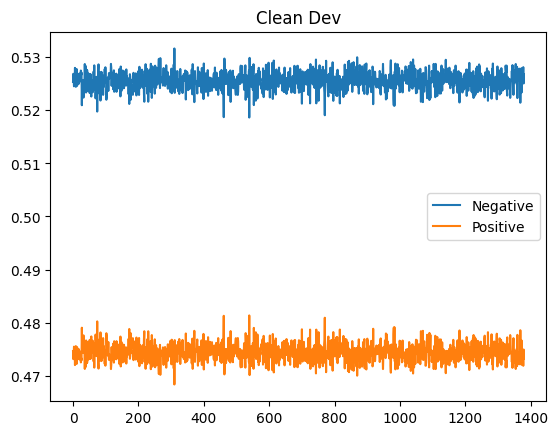

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
first_elements = [arr[0] for arr in final_dev]
second_elements = [arr[1] for arr in final_dev]

# Create a list for the x-axis (the indices of the arrays)
x = range(len(final_dev))

# Plot the first line (the first elements)
plt.plot(x, first_elements, label='Negative')

# Plot the second line (the second elements)
plt.plot(x, second_elements, label='Positive')
plt.title("Clean Dev")

plt.legend()
plt.show()

In [ ]:
print(model.config.id2label)


{0: 'LABEL_0', 1: 'LABEL_1'}


In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import os, json
result = {}

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base')

def analysis(file_path, name):
  with open(file_path, 'r') as f:
    data = json.load(f)
    data = data["TEXT"]
    data = "".join(data).replace("...", "")


  text = data
  # print("text:", text[:10])
  # Tokenize the text
  tokens = tokenizer.tokenize(text)

  # Split tokens into chunks, overlap of 100 tokens
  chunk_size = 514
  chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size - 15)]
  # print("chunks: ", chunks)
  # Process each chunk separately
  predictions = []

  for chunk in chunks:
      # Convert chunk to string
      chunk_text = tokenizer.convert_tokens_to_string(chunk)
      # Encode chunk and run through model
      inputs = tokenizer(chunk_text, return_tensors='pt', truncation=True, padding=True)
      output = model(**inputs)
      # print("output:", output)
      # Apply softmax to output to get probabilities
      probabilities = torch.nn.functional.softmax(output.logits, dim=-1)
      predictions.append(probabilities)
  # print("predictions:", predictions)

    # Aggregate predictions
    # This is just a simple example: you might want to use a more sophisticated method
  aggregated_predictions = torch.mean(torch.stack(predictions), dim=0)
  output = aggregated_predictions.detach().numpy()
  # result[name] = [output[0][0], output[0][1]]
  return output[0]





input_directory = '/content/drive/MyDrive/Capstone Project/clean_test'
final_dev = []
# loop through the files
for filename in os.listdir(input_directory):
    if filename.endswith('.json'):  # check if file is a json file
        name = filename[8:18]
        # print("name:", name)
        file_path = os.path.join(input_directory, filename)
        ans = analysis(file_path, name)
        final_dev.append(ans)


print(final_dev)




Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

[array([0.49376744, 0.50623256], dtype=float32), array([0.49361983, 0.50638014], dtype=float32), array([0.49285966, 0.5071404 ], dtype=float32), array([0.49342862, 0.5065714 ], dtype=float32), array([0.49484807, 0.50515187], dtype=float32), array([0.49316287, 0.50683707], dtype=float32), array([0.49349204, 0.506508  ], dtype=float32), array([0.4986868 , 0.50131327], dtype=float32), array([0.49250555, 0.5074945 ], dtype=float32), array([0.49632105, 0.503679  ], dtype=float32), array([0.49257892, 0.5074211 ], dtype=float32), array([0.50007904, 0.499921  ], dtype=float32), array([0.4994647, 0.5005353], dtype=float32), array([0.49901474, 0.5009853 ], dtype=float32), array([0.49175608, 0.50824386], dtype=float32), array([0.49020925, 0.5097907 ], dtype=float32), array([0.49891368, 0.5010864 ], dtype=float32), array([0.49522173, 0.50477827], dtype=float32), array([0.49428806, 0.5057119 ], dtype=float32), array([0.4904076 , 0.50959235], dtype=float32), array([0.49500644, 0.50499356], dtype=flo

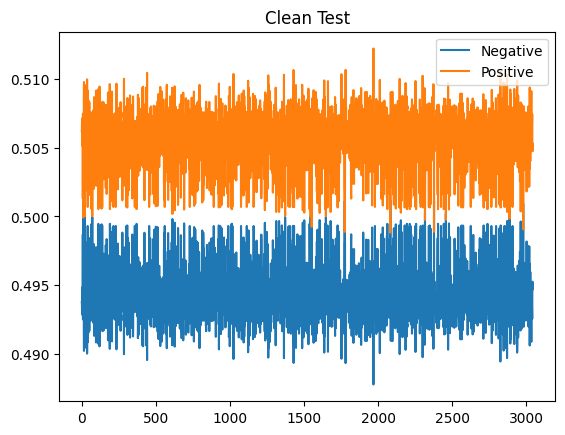

In [ ]:
first_elements = [arr[0] for arr in final_dev]
second_elements = [arr[1] for arr in final_dev]

# Create a list for the x-axis (the indices of the arrays)
x = range(len(final_dev))

# Plot the first line (the first elements)
plt.plot(x, first_elements, label='Negative')

# Plot the second line (the second elements)
plt.plot(x, second_elements, label='Positive')
plt.title("Clean Test")

plt.legend()
plt.show()

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
import torch
import os, json
result = {}

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base')

def analysis(file_path, name):
  with open(file_path, 'r') as f:
    data = json.load(f)
    data = data["TEXT"]
    data = "".join(data).replace("...", "")


  text = data
  # print("text:", text[:10])
  # Tokenize the text
  tokens = tokenizer.tokenize(text)

  # Split tokens into chunks, overlap of 100 tokens
  chunk_size = 514
  chunks = [tokens[i:i + chunk_size] for i in range(0, len(tokens), chunk_size - 15)]
  # print("chunks: ", chunks)
  # Process each chunk separately
  predictions = []

  for chunk in chunks:
      # Convert chunk to string
      chunk_text = tokenizer.convert_tokens_to_string(chunk)
      # Encode chunk and run through model
      inputs = tokenizer(chunk_text, return_tensors='pt', truncation=True, padding=True)
      output = model(**inputs)
      # print("output:", output)
      # Apply softmax to output to get probabilities
      probabilities = torch.nn.functional.softmax(output.logits, dim=-1)
      predictions.append(probabilities)
  # print("predictions:", predictions)

    # Aggregate predictions
    # This is just a simple example: you might want to use a more sophisticated method
  aggregated_predictions = torch.mean(torch.stack(predictions), dim=0)
  output = aggregated_predictions.detach().numpy()
  # result[name] = [output[0][0], output[0][1]]
  return output[0]





input_directory = '/content/drive/MyDrive/Capstone Project/clean_train'
final_dev = []
# loop through the files
for filename in os.listdir(input_directory):
    if filename.endswith('.json'):  # check if file is a json file
        name = filename[8:18]
        # print("name:", name)
        file_path = os.path.join(input_directory, filename)
        ans = analysis(file_path, name)
        final_dev.append(ans)


print(final_dev)




Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should pr

[array([0.47602326, 0.5239768 ], dtype=float32), array([0.47792006, 0.52207994], dtype=float32), array([0.47566023, 0.5243398 ], dtype=float32), array([0.47740272, 0.52259725], dtype=float32), array([0.47722697, 0.522773  ], dtype=float32), array([0.47622713, 0.5237729 ], dtype=float32), array([0.47873443, 0.52126557], dtype=float32), array([0.47484124, 0.52515876], dtype=float32), array([0.47756317, 0.5224368 ], dtype=float32), array([0.47503906, 0.524961  ], dtype=float32), array([0.47650144, 0.5234986 ], dtype=float32), array([0.47583708, 0.524163  ], dtype=float32), array([0.47607315, 0.52392685], dtype=float32), array([0.47480747, 0.5251925 ], dtype=float32), array([0.47396356, 0.52603644], dtype=float32), array([0.47659677, 0.5234032 ], dtype=float32), array([0.4790164, 0.5209836], dtype=float32), array([0.47621933, 0.5237807 ], dtype=float32), array([0.47291765, 0.5270823 ], dtype=float32), array([0.4759857, 0.5240143], dtype=float32), array([0.47902536, 0.52097464], dtype=float